# Midterm Project 
*Matthew Ueckermann*

## Problem to explore: Toxic Chemical Releases

All manufacturing plants release toxic chemicals to the air, water, and/or land around them. These chemicals impact the life of people, plants, and animals surrounding these facilities. In some cases, communities have been inadvertently poisoned by surrounding industries. One recently publicized example is how the use of PFOAs by DuPont in West Virginia led to significantly higher cancer rates in the surrounding town. This inspired the  documentary the [Devil We Know](https://en.wikipedia.org/wiki/The_Devil_We_Know), which has helped contributed to growing restrictions on these chemicals. This restarted talks about the need for transparency and understanding of the chemicals which are polluted in the United States, as it gives communities the right to know what they are exposed to, as well as recourse to hold companies liable.

A dataset already exists to manage this transparency, although it did not include PFOAs until recently. That dataset is the [Toxics Release Inventory (TRI)](https://en.wikipedia.org/wiki/Toxics_Release_Inventory) which contains all chemicals released by manufacturing plants in the U.S. which must be reported to the EPA. This was established in 1986 to bring transparency to the chemical industry, partially as a reaction to the [1984 Bhopal disaster](https://en.wikipedia.org/wiki/Bhopal_disaster), which started one of the first movements for community right to know. This dataset was introduced to me in one of my previous courses as one of the most efficient pieces of environmental legislation; however, I have not had the opportunity to explore it. 

## Some Additional Background

In chemical manufacturing it is impossible not to release some amount of toxic chemical (pressure equipment, incinerators, and wastewater treatment can never be perfect) while accidents will also cause unintended releases. However, it is still possible to mitigate them, at making incremental improvements over time. I am interested in what trends exist in environmental control, specifically in the chemical industry. These include how the mode of chemical emissions has changed over time, as well as general chemical emissions by state over time. Similarly, the impact of the political nature of a given state on toxic chemical releases also interests me, as will conservative states allow for a greater number of releases than liberal states?

I am also interested in if there are any trends in in the types of chemical emitted by state overtime, as not all toxic chemicals are equal. Specifically, dioxins are considered the most toxic man-made compounds [(a daily intake of 2*10^-12 grams/kg body weight is considered safe for humans)](https://en.wikipedia.org/wiki/Dioxins_and_dioxin-like_compounds#Human_toxicity), while other compounds like persistent and bioaccumulate compounds (which include PFOA) are considered extremely toxic. In addition, we can also consider conventional carcinogens, as chemicals of special concern. 

Note that the TRI reporting requirements have changed over time, a breakdown of major changes and its history is given [here] (https://www.epa.gov/toxics-release-inventory-tri-program/timeline-toxics-release-inventory-milestones).

## Specific Research Questions

The specific research questions that I attempted to answer in this analysis are given below:

- What are the general trends in toxic chemical emissions over time? 
    - Have chemcial emissions decreased since the implementation of the TRI?
    - How does this depend on the industry?
    - How does this depend on the type of chemical emmited within the chemical industry?
- Where are these chemicals emitted?
    - How has this changed overtime?
- What trends exist in toxic chemical emissions by state?
    - Is there any "red state"-"blue state" effect?

## Motivation for these Questions and Prior Work

Chemical releases, especially of toxic chemicals, are important to manage and minimize. Knowledge of how chemical emissions are managed is necessary for surrounding communities, so that they can monitor their health and hold companies which poison them liable. Because of this, chemical plants attempt to minimize releases from year to year following industrial best practices. By looking at overall trends, we can provide data could motivate communities to look at releases in their area, as they illustrate how many chemicals are pumped into our environment each year. While these trends are also important for industry to follow, as to ensure that they are constantly innovating. Finally, geographic, and especially political differences, in these emissions could indicate the importance of political ideology on environmental regulations pertaining to these releases.

To motivate the need to understand toxic chemical releases, one needs to look no further than at the EPA, an industry created to reduce these emissions. From organizations like these, we know it is essential to reduce toxic emissions to improve human health and  environmental health. While this specific research using the TRI follows in tradition of others who have used this data on a regional scale. This includes two interesting studies from the 1990s which look at correlations between chemical releases and community composition [1] as well as the impact of employees in pollution abatement programs on emissions [2]. By following in these footsteps, I hope to shed light on chemical emissions in the decades since these studies have been published in a digestible way.

Works Cited
1. Arora, S., Cason, T. N., Arora, S. & Casont, T. N. Do Community Characteristics Influence Environmental Outcomes? Evidence from the Toxics Release Inventory Southern Economic Association, 65, 691–716 (1999).
2. Bunge, J., Cohen-rosenthal, E. & Ruiz-quintanilla, Employee participation in pollution reduction : preliminary analysis of the Toxics , Release Inventory. Journal of cleaner Production 4, 9–16 (1996).


## Data set to be used

CSV files for the TRI from 1987-2019 are accesssible [here](https://www.epa.gov/toxics-release-inventory-tri-program/tri-basic-data-files-calendar-years-1987-2019?).

Documentation about the dataset is given in this [pdf](https://www.epa.gov/sites/production/files/2019-08/documents/basic_data_files_documentation_aug_2019_v2.pdf).

## Some Disclaimers

Some ethical concerns and  I have about my analysis include:
- As a chemical engineering major entering industry (although in a more sustainably foucsed chemical company) I will have my own biases about the industry and will probably not be as critical as someone who is not.
- Chemical companies could use this analysis as evidence that they do better than their peers or other in a geographic area, which may disincentivize improvement.
- I am not an expert of the toxicity of different chemicals, I know generally PBTs/dioxins are worse than others on the list but there is not necessarly a consensus on all chemicals on the list. Treating them the same would be disingenuous, but may be necessary for this level.

Other considerations/compounding factors present in this overall analysis:
- The geographical distribution of chemical plants is skewed, i.e. there are a lot of petroleum refineries in Texas, but none in Massachusetts.
- You reach a level in emissions control technology where it can be hard (and costly) to improve, expecting plants to improve year to year is not realistic.
- Controlling by facility size is required in looking at fugitive air emissions as they are a function of the amount of pressurized equipment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from  scipy import stats 
from matplotlib import pyplot as plt

## Scraping the data

Scraped the data from CSV files which the EPA publishes for TRI data from 1987-2019  [here](https://www.epa.gov/toxics-release-inventory-tri-program/tri-basic-data-files-calendar-years-1987-2019?). Documentation about the dataset is given in this [pdf](https://www.epa.gov/sites/production/files/2019-08/documents/basic_data_files_documentation_aug_2019_v2.pdf).

In [2]:
# First coppied the 2019 file:
df_2019 = pd.read_csv('https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/2019/fname/TRI_2019_US.csv/CSV',low_memory=False)
# selecting the columns I am interested in
df = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]
del df_2019 # save space

#Scrape the rest
for x in range(1987,2019):
    address = 'https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/'+str(x)+'/fname/TRI_'+str(x)+'_US.csv/CSV'
    df_new = pd.read_csv(address,low_memory=False)
    
    df_new_trimmed = df_new[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]

    df = df.append(df_new_trimmed, ignore_index=True)
    del df_new
    time.sleep(2)

## Getting Familiar with the TRI: Looking at Industry Dependence 

It is interesting to see the impact of the specific industry on the overall chemicals emitted in the TRI, especially as in 1997 seven new industries were added to the TRI, which added a significant number of emissions listed. Without controlling for this, any overall trends would see a massive bump in emissions around this time.

One interesting way to look at this is to see how each industry contributes to the overall emission levels as reported in the TRI, which also answers two of my stated research questions:

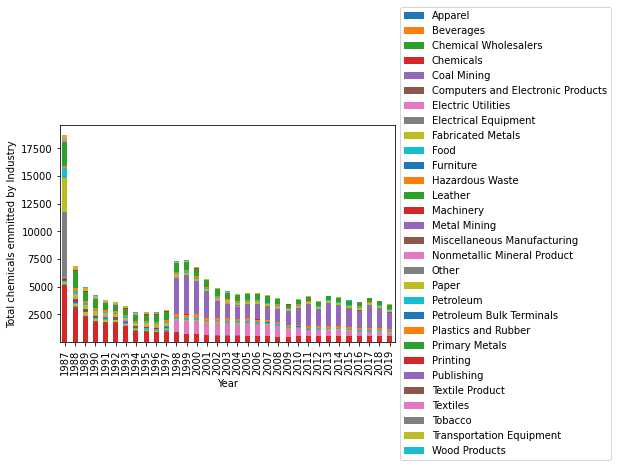

In [3]:
sumChem_byIndustry_year = df.groupby(["1. YEAR","20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()*10**-6
sumChem_byIndustry_year.unstack(level=1).plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.xlabel("Year")
plt.ylabel("Total chemicals emmited (MMlb)")
plt.ylabel("Total chemicals emmitted by Industry")
plt.show()

This figure is extremely overwhelming, but it demonstrates the spike in 1998, which you can see is mostly dominated by the addition of coal mining and electric production in the dataset. We can also see that several industries contribute more to toxic chemical industries than other, including the chemical industry and primary metals. Including coal mining and electric production, these two industries contribute to most of the emissions. This demonstrates that not all industries contribute to toxic emissions in the same magnitude and thus motivates focusing on some more than others.

The figure also shows that after the introduction of the TRI, in most industries subsequent amounts of total emissions decrease. This is even though production rates in most industries have most likely increased across these industries. One source for this is the [increase in US manufacturing output]( https://www.macrotrends.net/countries/USA/united-states/manufacturing-output). Although it is impossible to attribute this decrease to the TRI completely with this plot, some analysis has shown that implementation of the bill led to changes in companies stock prices [REF], which most likely motivated favorable responses to the bill. 

Note that the MMlb stands for million pounds

[REF] Konar, S., Cohen, M. Information As Regulation : The Effect of Community Right to Know Laws on Toxic Emissions. Journal of Environmental Economics and Management, 32, 109–124 (1997).


## Focusing on the Chemical Industry

From the figure above, we can make out that the chemical industry has traditionally been a large contributor of the amount of toxics materials released. As this is the industry that I am the most interested in, and the we which motivated the creation of the TRI, I want to look at it in more depth. Note that this industry does not include the similar petrouleum industry.

Starting with the same plot of total emissions:

In [4]:
df_chemical = df[df["20. INDUSTRY SECTOR"]=="Chemicals"]

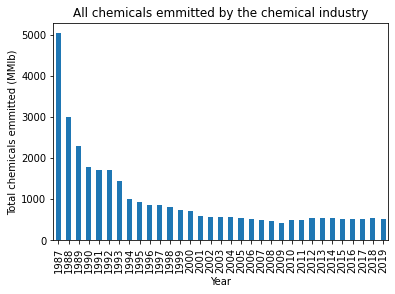

In [5]:
allChem = df_chemical.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()*10**-6
allChem.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Total chemicals emmitted (MMlb)")
plt.title("All chemicals emmitted by the chemical industry")
plt.show()

Here you can see that the total amount of chemicals emitted within the chemical industry dramatically in the first nine or so years after the introduction of the TRI. Likely, at this point companies had reduced emissions to such an extent that they no longer feared backlash from communities, or no longer saw it as economically viable to focus on reducing emissions from that point. As, from 1995-present, the decrease in chemical emissions has been much more gradual. Note that this again does not consider the increase in production over time.

With the added granularity of selecting an industry to investigate, it is possible to also investigate the type of chemicals which have been emitted over time. Starting with carcinogens, we can see the overall trend for the industry as given below.

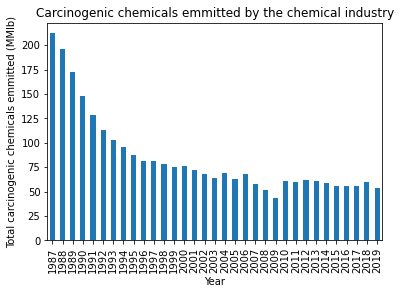

In [6]:
sumCarcinogensChem_year = df_chemical[df_chemical["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()*10**-6
sumCarcinogensChem_year.plot(kind='bar') 
plt.xlabel("Year")
plt.ylabel("Total carcinogenic chemicals emmitted (MMlb)")
plt.title("Carcinogenic chemicals emmitted by the chemical industry")
plt.show()

From this figure, we can see that the amount of carcinogenic chemicals emitted pre year by the chemical industry follows a similar trend to that of all TRI chemicals, with a rapid decrease until 1995 followed by more gradual decrease since then.

Following up with dioxins, considered the most toxic class of chemicals possible:

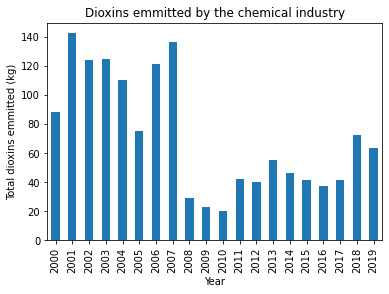

In [24]:
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()*10**-3
sumDioxChem_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Total dioxins emmitted (kg)")
plt.title("Dioxins emmitted by the chemical industry")
plt.show()

Note that the unit on this figure (kg) is different than the others, reflecting the significantly lower emissions of these chemicals in comparison to others.
For dioxins, the story is different, in 2008 a methodology change in the TRI was instituted which changed how dioxins are reported. This went from a total mass amount emitted to a relative toxicity. However, the trend presented is slightly considering as it seems that the emission of these chemicals has only increased since the adoption of this new policy.

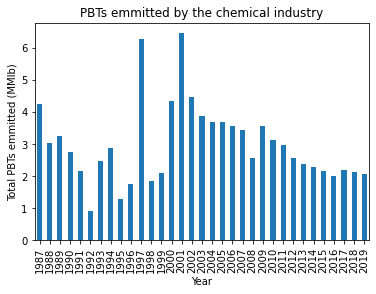

In [28]:
sumPBTChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()*10**-6
sumPBTChem_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Total PBTs emmitted (MMlb)")
plt.title("PBTs emmitted by the chemical industry")
plt.show()

For PBTs, the story is also less straightforward as in 2001 7 new PBTs were added to the list, including lead which is emitted in large quantities. Yet after the introduction of these compounds to the list, we see a continuous and rather rapid decrease in these emissions.

## Where do these emissions go?

To answer the questions pertaining to where these chemicals are emitted, we can first see whether chemicals are typically emitted on or offsite:

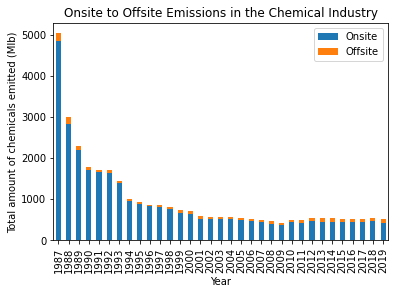

In [9]:
onsite = df_chemical.groupby(["1. YEAR"])["59. ON-SITE RELEASE TOTAL"].sum()*10**-6
offsite = df_chemical.groupby(["1. YEAR"])["82. OFF-SITE RELEASE TOTAL"].sum()*10**-6
df_emissionLocation = pd.concat({"Onsite":onsite,"Offsite":offsite},axis=1)
df_emissionLocation.plot.bar(y=['Onsite', "Offsite"], stacked=True)
plt.xlabel("Year")
plt.ylabel("Total amount of chemicals emitted (Mlb)")
plt.title("Onsite to Offsite Emissions in the Chemical Industry")
plt.show()

This indicates that the majority of the chemicals are emitted into the water or air surrounding a facility. Not sent to external facilities to be disposed of or recycled.

We can then see the way in which chemicals are typically emitted, focusing on water and air emissions:

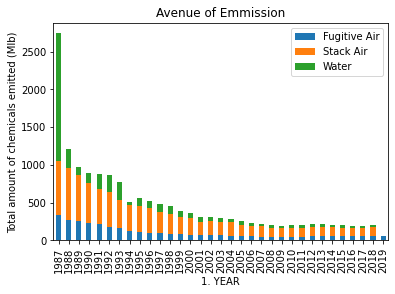

In [10]:
fugAir = df_chemical.groupby(["1. YEAR"])["45. 5.1 - FUGITIVE AIR"].sum()*10**-6
stackAir = df_chemical.groupby(["1. YEAR"])["46. 5.2 - STACK AIR"].sum()*10**-6
waterAir = df_chemical.groupby(["1. YEAR"])["47. 5.3 - WATER"].sum()*10**-6
df_emissionType = pd.concat({"Fugitive Air":fugAir,"Stack Air":stackAir,"Water":waterAir},axis=1)
df_emissionType.plot.bar(y=['Fugitive Air', "Stack Air","Water"], stacked=True)
plt.ylabel("Total amount of chemicals emitted (Mlb)")
plt.title("Avenue of Emmission")
plt.show()

We can see that after the introduction of the TRI, emissions to water were greatly reduced and now comprise a near negligible amount of the total amount reduced. While the stack air emissions (which account for purposeful emissions from units like incinerators which attempt to combust gasses before emission into non-toxic or less toxic alternatives, but are not perfect), seems to indicate an increase in the efficiency of incinerators which stagnated in 2006. While fugitive air emissions are those which escape inadvertently, mostly through equipment seals. The decrease in this quantity indicates better equipment or plant design, which has also seemed to stagnate around the same time.

From this analysis, we can see that toxic chemicals are now often emitted into the air. Similarly, we can see that this often occurs at the plant, indicating that communities around the plant should be well aware of the chemicals within the facility and how much are emitted.

## How do trends in emmissions differ by State?

One test is to see how the year with the maximum amount of chemical emissions in a state compares (usually 1987) with that with the lowest value in that state (usually 2019). This reveals the percent reduction in toxic emissions over the time frame.

In [11]:
year_state = df_chemical.groupby(["1. YEAR","8. ST"])["101. TOTAL RELEASES"].sum()*10**-6
year_state = year_state.reset_index()
year_state = year_state.drop(index=year_state[year_state["8. ST"]=="VI"].index) # Not state
year_state = year_state.drop(index=year_state[year_state["8. ST"]=="PR"].index) # Not state
year_state = year_state.drop(index=year_state[year_state["8. ST"]=="DC"].index) # Not state, remove both as small
year_state = year_state.drop(year_state[year_state["8. ST"]=="AK"].index)       # Does not report after 2008
year_state = year_state.drop(year_state[year_state["8. ST"]=="HI"].index)       # Does not report after 2013

In [12]:
state_max = year_state.groupby(["8. ST"])["101. TOTAL RELEASES"].max()
state_min = year_state.groupby(["8. ST"])["101. TOTAL RELEASES"].min()
state_percent_decrease = (state_max-state_min)/state_max *100 # Percent decrease in TRI of largest emmission year for stae in comparison to smallest

In [13]:
df_state_percent = pd.DataFrame(state_percent_decrease)
df_state_percent.index.names = ["State"]
df_state_percent.columns = ['Percent decrease']

Text(0.5, 1.0, 'Percent decrease in chemical emissionby state')

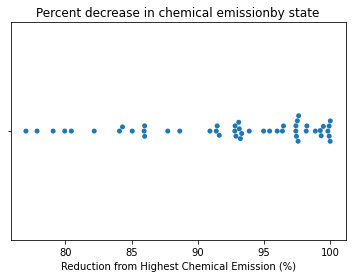

In [14]:
sns.swarmplot(x='Percent decrease', data = df_state_percent)
plt.xlabel("Reduction from Highest Chemical Emission (%)")
plt.ylabel("")
plt.title("Percent decrease in chemical emissionby state")

From this, we can see visually that some states have lagged behind others in reducing their chemical emissions. Using descriptive statistics we can characterize this distribution with:

In [15]:
df_state_percent.describe()

Percent decrease
count         48.000000
mean          92.333766
std            6.745488
min           77.028154
25%           87.299779
50%           93.263558
75%           97.578597
max           99.999981

To see specific states, you can sort and then print the entire series

In [16]:
df_state_percent.sort_values(by='Percent decrease', ascending = False)

Percent decrease
State                  
ND            99.999981
NM            99.991525
SD            99.917678
NH            99.915790
RI            99.816023
DE            99.476223
ME            99.312514
CT            99.248165
VT            98.872631
AL            98.233391
VA            98.183461
UT            97.613111
AZ            97.567093
NY            97.516621
WV            97.445819
MO            97.406690
MA            97.400547
WA            96.467133
IN            96.387247
KS            95.992018
MD            95.421163
CA            94.969246
AR            93.886099
TX            93.312747
NJ            93.214370
TN            93.134878
LA            93.090703
PA            92.880404
WY            92.813301
MI            92.792188
KY            91.619677
NV            91.464143
MN            91.394594
IL            90.917119
CO            88.639836
NC            87.735423
FL            85.992849
OR            85.991402
WI            85.952334
SC            85.053844
MT            84.316297
IA            84.086594
MS            82.183526
ID            80.457130
NE            79.957966
OH            79.082524
GA            77.868585
OK            77.028154

From this, we can see that there are three states whose percent decrease in emissions is two standard deviations below the sample mean. These include Ohio, Georgia, and Oklahoma. Similary, when looking at these trends we see that, to a certain extent, the states at the bottom of the list are considered more conservative than those at the top. But to prove or make anything more of this, more anaylsis is needed.

## How do trends in State emmissions data correlate with politcal ideology?

We can determine if there is a correlation in the yearly decrease in toxic chemical emissions in a state with the state's political ideology using an objective marker of the state’s political ideology over time. One example is the indicator created by [Berry et al.](https://journals-sagepub-com.udel.idm.oclc.org/doi/10.1177/153244001001000201). This gives a nominate measure of state government ideology. It computes this by looking at the votes of a state’s congressional delegation as well as interest group ratings and extrapolating them to similar party state politicians. 

Note it is on a scale of 0-100 going from completely conservative - completely liberal.

Note that the dataset was retrieved [here](https://rcfording.com/state-ideology-data/), but was pre-processed in Excel to standardize and add state abbreviations.   

To compare these values to chemical emissions within a state, we can sum all chemical emissions within a state for a given year and then try to normalize these values to that in 1987. This allows us to compare normalized changes in emissions in a state with the state’s political ideology in a given year.

In [29]:
df_stIdeology = pd.read_csv("Data/stateideology_v2018.csv")
# New metrics:
year_state["Normalized Release"] = np.nan
year_state["Difference in Release"]= np.nan
year_state["Ideology score"] = np.nan
year_state["Difference in Ideology score"] = np.nan

In [18]:
# To match and normalize the data:
pd.options.mode.chained_assignment = None # Suppresses warning message
for state in year_state[year_state["1. YEAR"]==1987]["8. ST"]:
    for year in range(1987,2018):
        original_val = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==1987)]["101. TOTAL RELEASES"].values[0]
        current_val = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)]["101. TOTAL RELEASES"].values[0]
        norm_val = current_val/original_val
        year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Normalized Release"] = norm_val
        
        ideology_score = df_stIdeology[(df_stIdeology["year"]==year)&(df_stIdeology["State Abbreviation"]==state)]["State ideology"].values[0]
        year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Ideology score"] = ideology_score
        
        if(year!=1987):
            pre_val = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==(year-1))]["Normalized Release"].values[0]
            difference = norm_val-pre_val
            year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Difference in Release"] = difference
            
            pre_ideology = year_state[(year_state["8. ST"]==state) & (year_state["1. YEAR"]==(year-1))]["Ideology score"].values[0]
            id_diff = ideology_score-pre_ideology
            
            year_state.loc[((year_state["8. ST"]==state) & (year_state["1. YEAR"]==year)),"Difference in Ideology score"] = id_diff

year_state = year_state.drop(year_state[year_state["1. YEAR"]==1987].index) #remove baseline - removes straightlines in dataset
year_state = year_state.dropna()

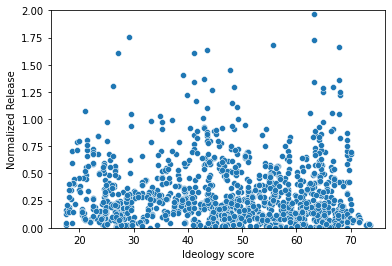

In [19]:
sns.scatterplot(y = "Normalized Release", x = "Ideology score", data = year_state)
plt.ylim(0,2) # some outliers exist above, but shows bulk of the data
plt.show()

This plot is quite messy, but essentially shows that visually there is little impact of the ideology score on the normalized release. However, when we determine the Pearson correlation coefficient of the data we find:

In [20]:
[r, p] = stats.pearsonr(year_state["Ideology score"],year_state["Normalized Release"])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

The Pearson correlation coefficient is:  -0.06861897067090231 and is statistically significant with a p of  0.00919504059615393


This indicates that there is a real result, with more liberal states having lower normalized emissions; however, this effect size is quite small so it should not be taken seriously.

There does not seem to be a correlation between a specific stats change in normalized emmissions and the change in its political ideology. By plotting the yearly difference in these two values for each state we find:

Text(0, 0.5, 'Change in Normalized Emissions')

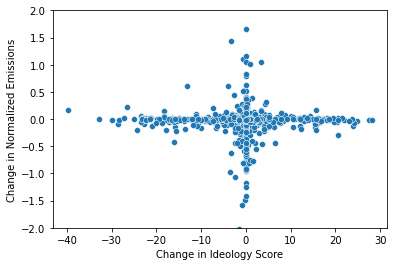

In [21]:
sns.scatterplot(y = "Difference in Release", x = "Difference in Ideology score", data = year_state)
plt.ylim(-2, 2)
plt.xlabel("Change in Ideology Score")
plt.ylabel("Change in Normalized Emissions")

For which the correlation coefficient is given by:

In [22]:
[r, p] = stats.pearsonr(year_state["Difference in Ideology score"],year_state["Difference in Release"])
print("The Pearson correlation coefficient is: ", r, "and is not statistically significant with a p of ", p)

The Pearson correlation coefficient is:  0.0019269712362631518 and is not statistically significant with a p of  0.9417583843588693


From the first figure, we can see a *minor* impact of political ideology on the normalized emissions in a state, indicating that more liberal states emit less toxic chemicals than conservative ones relative to the amount that they emitted in 1987. This is not a very strong claim, as there are many confounding factors which were not controlled for, including facility production size, which would likely harm more conservative states. Specifically, many chemical companies have large facilities on the gulf coast, which contains some of the most politically conservative states. The weakness of the claim is also demonstrated by the fact that the yearly in the political ideology has no impact on the yearly change in the normalized emissions, indicating that political drift has not impacted chemical releases.

However, the first correlation indicates that there may be some connection. A more complete treatment controlling for production size as well as focusing on specific chemicals may provide a better indication if this red-state - blue-state effect is real..

## Conclusions

This analysis provides a cursory breakdown on general trends in toxic chemical emissions in the US as reported in the TRI. Notably, we saw how the TRI seems to have motivated an initial quick decrease in toxic chemical emissions; however, this decrease has leveled off for the most part. We also learned that chemical emissions are very industry specific. We also saw how chemicals which are more toxic than others (carcinogens, dioxins, and PBTs) have been controlled in the chemical industry. We then learned that the majority of chemicals are released to the air surrounding a chemical plant, indicating the need for the surrounding community to be informed. Finally, we looked at the how chemical emissions are correlated by state, seeing that some states have done a better job limiting these emissions than others. While there does not appear to be a strong effect of the political ideology of the state on these emissions

### Future work
To expand on this analysis, I would recommend focusing on specific states, or choosing some states to be a case study. As by narrowing down the data set, one is better able to look at the different types of chemicals released, as well as reference changes in emissions data to changes in state law/code. I would also recommend controlling by plant production, which may necessitate the incorporation of other datasets.